Variant:

А= В * МС + D * MZ + E * MM

MG = min(D+E) * MM * MT - MZ * ME

In [531]:
from random import randint, uniform
from threading import Thread

import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

In [532]:
MIN_FLOAT_VALUE = 0.0
MAX_FLOAT_VALUE = 25.0
MIN_FLOAT_EXPONENT = 2
MAX_FLOAT_EXPONENT = 4

DIM_RANGE = range(110, 190)

EXCEL_NAME = 'values.xlsx'

DATA_COLUMNS = ['vector_b','vector_d','vector_e','matrix_mc', 'matrix_mz', 'matrix_mm', 'matrix_mt', 'matrix_me']
RESULT_FILE = "result.txt"

FIRST_PLOT = "А=В*МС+D*MZ+E*MM"
SECOND_PLOT = "MG=min(D+E)*MM*MT-MZ*ME"

In [533]:
class LabMathConstructs:
  def vector(self, d):
    return np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            ) 
            for _ in range(d)
          ]
    )


  def matrix(self, d):
    matrix = np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            )
            for _ in range(d ** 2)
        ]
    )
    return matrix.reshape((d, d))

In [534]:
mc = LabMathConstructs()

vector_b = [mc.vector(d) for d in DIM_RANGE]
vector_d = [mc.vector(d) for d in DIM_RANGE]
vector_e = [mc.vector(d) for d in DIM_RANGE]
matrix_mc = [mc.matrix(d) for d in DIM_RANGE]
matrix_mz = [mc.matrix(d) for d in DIM_RANGE]
matrix_mm = [mc.matrix(d) for d in DIM_RANGE]
matrix_mt = [mc.matrix(d) for d in DIM_RANGE]
matrix_me = [mc.matrix(d) for d in DIM_RANGE]

df = pd.DataFrame(list(zip(vector_b, vector_d, vector_e, matrix_mc, matrix_mz, matrix_mm, matrix_mt, matrix_me)), columns=DATA_COLUMNS)
df.to_excel(EXCEL_NAME)
df.head()

,vector_b,vector_d,vector_e,matrix_mc,matrix_mz,matrix_mm,matrix_mt,matrix_me
0,"[23.45, 6.249, 5.958, 22.1412, 10.311, 19.7616...","[6.603, 13.61, 1.22, 6.646, 8.98, 22.6787, 19....","[19.386, 16.583, 19.0, 0.02, 1.7706, 5.8656, 1...","[[12.085, 15.487, 0.2329, 17.76, 11.159, 3.862...","[[1.6538, 5.275, 16.1, 1.9549, 11.8902, 21.439...","[[9.0541, 24.97, 18.393, 7.19, 5.72, 7.7108, 1...","[[8.8432, 10.08, 17.944, 22.75, 15.494, 23.28,...","[[6.59, 24.2375, 4.35, 4.006, 16.56, 2.21, 1.7..."
1,"[10.3102, 10.741, 5.78, 10.29, 23.6598, 24.777...","[6.58, 21.1128, 3.902, 8.307, 19.42, 7.5034, 2...","[15.16, 21.8971, 9.41, 7.9881, 1.85, 15.406, 7...","[[6.42, 15.82, 2.36, 2.136, 2.4536, 12.2058, 1...","[[12.3868, 21.201, 7.11, 9.87, 17.77, 11.6323,...","[[12.437, 6.5818, 11.5692, 2.0302, 5.54, 24.98...","[[6.5052, 16.2502, 23.305, 19.06, 22.779, 22.9...","[[18.0468, 5.492, 10.7099, 11.537, 16.579, 23...."
2,"[20.28, 4.2758, 1.505, 21.95, 20.02, 6.8258, 0...","[17.3167, 5.6754, 22.7625, 0.9267, 22.25, 3.43...","[22.089, 0.23, 4.2486, 15.3289, 3.9821, 17.85,...","[[10.97, 22.6625, 20.431, 1.751, 1.0018, 20.97...","[[3.2741, 13.24, 15.02, 2.022, 23.581, 3.2191,...","[[16.055, 23.828, 20.1809, 1.0871, 13.5893, 0....","[[18.97, 22.89, 12.44, 17.485, 9.1324, 24.725,...","[[11.6481, 8.5, 19.44, 7.19, 24.69, 13.9573, 1..."
3,"[10.2526, 22.38, 8.464, 13.2704, 11.132, 20.04...","[14.45, 8.6473, 14.12, 15.753, 23.63, 6.02, 6....","[24.818, 22.702, 3.152, 4.395, 13.253, 6.8729,...","[[5.0319, 4.567, 5.7513, 19.1488, 8.982, 16.46...","[[20.0672, 17.647, 12.6322, 6.1555, 3.9038, 9....","[[11.3486, 18.086, 5.4978, 8.918, 14.24, 15.00...","[[20.21, 19.5516, 3.1197, 7.422, 5.8371, 20.37...","[[9.1, 4.1478, 9.04, 21.0622, 10.208, 22.882, ..."
4,"[22.8305, 18.1523, 11.4432, 16.5362, 14.573, 1...","[3.128, 18.632, 23.16, 8.489, 24.634, 22.458, ...","[23.666, 6.6368, 21.32, 1.71, 3.641, 6.099, 23...","[[20.36, 7.1085, 4.0033, 24.0007, 18.26, 17.18...","[[24.97, 14.7409, 0.4849, 11.8753, 2.3377, 21....","[[22.79, 3.07, 4.9651, 13.71, 18.3143, 21.08, ...","[[24.8911, 24.26, 2.627, 14.933, 21.86, 8.152,...","[[23.055, 10.48, 5.5925, 14.63, 11.72, 2.2017,..."


In [535]:
if (os.path.exists(RESULT_FILE)):
  os.remove(RESULT_FILE)

In [536]:
def save_result_as_file(text):
  file = open(RESULT_FILE, "a")
  file.write(f"{text}")
  file.close()

In [537]:
class FirstStatement:
  def b_dot_mc(self, b, mc):
    return np.dot(b, mc)

  def d_dot_mz(self, d, mz):
    return np.dot(d, mz)

  def e_dot_mm(self, e, mm):
    return np.dot(e, mm)

  def result_a(self, b_dot_mc, d_dot_mz, e_dot_mm):
    res = np.add(b_dot_mc, np.add(d_dot_mz, e_dot_mm))
    save_result_as_file(res)
    print(res)

In [538]:
class SecondStatement:
  def min_d_add_e(self, d, e):
    return np.amin(np.add(d, e))

  def mm_dot_mt(self, mm, mt):
    return np.dot(mm, mt)

  def mz_dot_me(self, mz, me):
    return np.dot(mz, me)

  def result_mg(self, min_d_add_e, mm_dot_mt, mz_dot_me):
    res = np.subtract(np.dot(min_d_add_e, mm_dot_mt), mz_dot_me)
    save_result_as_file(res)
    print(res)

In [539]:
class LabFirstThread:
    def __init__(self):
      self.fs = FirstStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, b, mc):
        self.first_thread_result = self.fs.b_dot_mc(b, mc)

    def second_thread(self, d, mz):
        self.second_thread_result = self.fs.d_dot_mz(d, mz)

    def third_thread(self, e, mm):
        self.third_thread_result = self.fs.e_dot_mm(e, mm)

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.fs.result_a(self.first_thread_result, self.second_thread_result, self.third_thread_result)

class LabSecondThread:
    def __init__(self):
      self.ss = SecondStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, d, e):
        self.first_thread_result = self.ss.min_d_add_e(d, e)

    def second_thread(self, mm, mt):
        self.second_thread_result = self.ss.mm_dot_mt(mm, mt)

    def third_thread(self, mz, me):
        self.third_thread_result = self.ss.mz_dot_me(mz, me)

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.ss.result_mg(self.first_thread_result, self.second_thread_result, self.third_thread_result)

In [540]:
class LabRuns:
  def __init__(self):
    self.xs_1_1 = []
    self.ys_1_1 = []

    self.xs_1_2 = []
    self.ys_1_2 = []

    self.xs_2_1 = []
    self.ys_2_1 = []

    self.xs_2_2 = []
    self.ys_2_2 = []

    self.starting_time = 0
    self.ending_time = 0
    self.actual_time = 0

  def start_time(self, thread_num, run_num):
      self.starting_time = time.time()
      self.print_thread_start(thread_num, run_num)

  def end_time(self):
      self.ending_time = time.time()
      self.actual_time = self.ending_time - self.starting_time

  def print_thread_start(self, thread_num, run_num):
    print(f"Start Thread #{thread_num}_{run_num}")

  def run_first_thread_first_run(self, i):
    fs = FirstStatement()

    thread = Thread(target=fs.result_a, args=[fs.b_dot_mc(vector_b[i], matrix_mc[i]), fs.d_dot_mz(vector_d[i], matrix_mz[i]), fs.e_dot_mm(vector_e[i], matrix_mm[i]),],)
    thread.start()
    thread.join()

  def run_second_thread_first_run(self, i):
    ss = SecondStatement()

    thread = Thread(target=ss.result_mg, args=[ss.min_d_add_e(vector_d[i], vector_e[i]), ss.mm_dot_mt(matrix_mm[i], matrix_mt[i]), ss.mz_dot_me(matrix_mz[i], matrix_me[i]),],)
    thread.start()
    thread.join()

  def first_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.ys_1_1.append(len(vector_b[i]))
        
        self.start_time(i + 1, 1)
        self.run_first_thread_first_run(i)
        self.end_time()

        self.xs_1_1.append(self.actual_time)
        self.ys_1_2.append(len(vector_b[i]))
        
        self.start_time(i + 1, 2)
        self.run_second_thread_first_run(i)
        self.end_time()
        
        self.xs_1_2.append(self.actual_time)

  def run_first_threads_first_run(self, i):
        self.ys_2_1.append(len(vector_b[i]))

        thread = LabFirstThread()

        first_threads = []

        self.start_time(i + 1, 1)

        first_threads.append(Thread(target=thread.first_thread, args=[vector_b[i], matrix_mc[i]],))
        first_threads.append(Thread(target=thread.second_thread, args=[vector_d[i], matrix_mz[i]],))
        first_threads.append(Thread(target=thread.third_thread, args=[vector_e[i], matrix_mm[i]],))
        first_threads.append(Thread(target=thread.fourth_thread))

        for thread in first_threads:
          thread.start()
        for thread in first_threads:
          thread.join()

        self.end_time()

        self.xs_2_1.append(self.actual_time)
        self.ys_2_2.append(len(vector_b[i]))

  def run_second_threads_first_run(self, i):
        thread = LabSecondThread()
        second_threads = []

        self.start_time(i + 1, 2)

        second_threads.append(Thread(target=thread.first_thread, args=[vector_d[i], vector_e[i]],))
        second_threads.append(Thread(target=thread.second_thread, args=[matrix_mm[i], matrix_mt[i]],))
        second_threads.append(Thread(target=thread.third_thread, args=[matrix_mz[i], matrix_me[i]],))
        second_threads.append(Thread(target=thread.fourth_thread))

        for thread in second_threads:
          thread.start()
        for thread in second_threads:
          thread.join()

        self.end_time()
        self.xs_2_2.append(self.actual_time)

  def second_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.run_first_threads_first_run(i)
        self.run_second_threads_first_run(i)

In [541]:
runs = LabRuns()

In [542]:
runs.first_run()

Start Thread #1_1
[53692.57081622 50764.13652118 51213.49971874 50482.64098976
 49928.88989194 49786.05733409 51456.10819008 52046.88879276
 50370.82606437 48510.80935985 50890.98752489 53122.12938636
 47466.44102772 52334.07060876 50246.20204981 50756.2963188
 51209.57981992 53167.57481951 48472.21595202 48262.42114393
 52295.78385576 50434.07619151 50819.71445655 51634.55243109
 50876.56808725 51215.17265419 48710.86934045 50428.06094114
 45673.17245641 50038.72715719 51410.85533283 53646.96907992
 50918.99855214 52612.97906465 52425.80354304 51620.34994395
 49199.72197834 49619.10477348 52092.00704907 50649.89028348
 54562.09329875 55106.49422525 48911.24328686 51156.13045872
 50398.16900245 51507.4120548  49608.4726926  52135.84975318
 50012.1861859  52549.09329758 50369.32081916 50420.44531673
 51127.83864892 49997.53803723 48758.8782651  51074.89214345
 51477.07771981 50785.53816512 52049.04652259 51298.0173383
 50271.93787071 50484.48201469 50653.01443981 47220.88776236
 51942.3

In [543]:
runs.second_run()

Start Thread #1_1
[53692.57081622 50764.13652118 51213.49971874 50482.64098976
 49928.88989194 49786.05733409 51456.10819008 52046.88879276
 50370.82606437 48510.80935985 50890.98752489 53122.12938636
 47466.44102772 52334.07060876 50246.20204981 50756.2963188
 51209.57981992 53167.57481951 48472.21595202 48262.42114393
 52295.78385576 50434.07619151 50819.71445655 51634.55243109
 50876.56808725 51215.17265419 48710.86934045 50428.06094114
 45673.17245641 50038.72715719 51410.85533283 53646.96907992
 50918.99855214 52612.97906465 52425.80354304 51620.34994395
 49199.72197834 49619.10477348 52092.00704907 50649.89028348
 54562.09329875 55106.49422525 48911.24328686 51156.13045872
 50398.16900245 51507.4120548  49608.4726926  52135.84975318
 50012.1861859  52549.09329758 50369.32081916 50420.44531673
 51127.83864892 49997.53803723 48758.8782651  51074.89214345
 51477.07771981 50785.53816512 52049.04652259 51298.0173383
 50271.93787071 50484.48201469 50653.01443981 47220.88776236
 51942.3

Exception in thread Thread-30057:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30077:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #15_2
[[14033.43961529  9045.5991355   9609.13120594 ... 13997.71434532
   8730.19414511 13704.15343789]
 [14084.10775538 11983.76037557 11316.5212287  ... 14853.17170719
  12555.48137508 13587.40409716]
 [13969.68449128 10800.22139002 11565.43267487 ... 17117.22497881
  11797.47957332 14376.04668639]
 ...
 [17760.63841216 12023.2654833  15064.64244682 ... 16289.65352484
  13527.98508378 15978.23299661]
 [12080.00049643  9431.33688674  9769.57753118 ... 13292.50332892
  10566.56371095 13906.02615564]
 [15057.75283047 12993.66322038 11098.72813104 ... 16156.52568875
  10949.14580154 13860.8660433 ]]
Start Thread #16_1
[58460.72433296 59669.39581387 59388.80699188 57416.59544007
 59558.3662966  56511.37970836 56006.13148639 58237.20253301
 57837.57213099 58895.41692577 57531.67042208 57725.12206867
 59192.44806618 60742.59861643 56348.94292832 58705.72063446
 55011.63374777 60350.34927863 56164.82395145 59764.53312183
 56998.70730453 58482.53001717 59690.23808778 57641.95240

Exception in thread Thread-30117:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30121:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #23_1
Start Thread #23_2
[[ -727.58272678  1662.75062191 -2583.20068193 ...  1787.7623587
   -853.21251247 -4822.61457799]
 [-3092.81625603   803.1996051  -5434.76103347 ... -1469.25524242
  -1973.37262303 -4430.18663716]
 [-2360.31825888 -2420.82977058 -7636.27978264 ... -3025.22463165
  -3081.17813084 -5580.76625776]
 ...
 [-2422.70929039   423.94642996 -4322.80147161 ...   895.23369265
   -632.51093211 -4612.50335715]
 [-1562.94911675    19.39775063 -4425.30560592 ...  1279.10210256
   -893.60919217 -3694.81085723]
 [  -76.29156455  -828.08417965 -5077.87983747 ...   -45.72177318
   -927.60773457 -5235.3762082 ]]
Start Thread #24_1
[64954.84993668 65552.14406586 60365.98406439 62486.5404659
 61570.87888761 63067.0212265  61358.28168286 64138.72504652
 63687.05320154 60980.88307611 66209.9995088  65665.61337922
 60020.81619678 59628.91559672 62020.85047311 59289.60938841
 64868.92267476 61124.7405501  66635.39491301 63285.21839599
 63786.69694282 61410.60489201 60649.615

Exception in thread Thread-30153:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30177:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30181:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._t

Start Thread #27_2
[[34745.75064245 33234.74879467 34276.18807832 ... 30240.16127255
  30301.07546169 26793.07365808]
 [34328.08698898 30870.03336098 31491.85104201 ... 28216.16173209
  28423.4469577  25820.67208868]
 [31905.32402191 30029.05021719 30624.53409531 ... 31299.74448485
  29030.91034623 24898.38725687]
 ...
 [31922.36584953 30054.73898079 29140.84962435 ... 30028.98401104
  25089.38673728 27401.31767152]
 [32999.73440661 31044.63467199 34763.44336961 ... 31568.34066695
  28993.9678955  28583.49216719]
 [32989.13284502 30927.36290826 31738.81449029 ... 30130.604237
  29884.35367633 25514.29783594]]
Start Thread #28_1
[63035.68551383 63109.04629117 64288.20427011 68806.47950591
 65178.90300027 66998.3968248  64271.1155244  62054.01666678
 66721.05681675 66790.49723687 68834.59484283 65172.4140447
 64169.16981081 66346.90825943 63345.90985691 67485.38448589
 68050.95583419 62589.90887985 63160.03427824 64685.29770346
 65455.90667581 67901.28898299 69254.77019253 62546.16228537

Exception in thread Thread-30201:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


[[11564.61819842  4468.30811119  5293.78640271 ...  7881.05507499
   5432.47449148  7757.51261873]
 [ 5691.48553753  3013.6739822   3356.6462042  ...  6296.81708145
   1997.33876919  3339.62276403]
 [ 8146.5987963   4096.0230764   6403.13069172 ...  6860.09594561
   4899.81859133  6605.31645771]
 ...
 [ 8345.58963454  4658.89493469  3040.67383512 ...  4374.70234372
   2856.56612222  4568.42910835]
 [ 6944.35226255  1851.60733515  2302.97691699 ...  5372.02306956
   1787.45125425  3063.4106647 ]
 [11050.51043986  7222.00751697  6222.50183693 ...  6940.86006068
   4874.59660543  8140.80506713]]
Start Thread #32_1
[62958.9600835  66373.29936873 61333.38519437 64651.07268485
 62508.24337148 64098.60156291 59827.48804569 65180.67860866
 61783.93190257 61668.79867848 61738.64585605 63892.79945569
 66335.51772359 65267.71677376 65775.7084546  65989.71416575
 65314.06137551 65662.79844259 64034.11075689 61150.92643561
 64162.56832878 64218.03672862 67001.88511112 64225.94438973
 66008.43752339

Exception in thread Thread-30237:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30253:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #34_2
[[55850.27818345 48276.24250371 54709.92039069 ... 47828.55065782
  48512.77966206 46915.06367281]
 [68585.3302359  48189.78688088 60782.96654916 ... 50409.11013079
  50945.02683316 48605.62903679]
 [68741.56864437 52978.96475616 64832.67371619 ... 60792.2878072
  56011.60144903 58380.76933702]
 ...
 [70705.60607067 50929.15887062 58422.72868394 ... 58644.77827854
  52177.45619515 56481.32102524]
 [67539.35835476 52881.7421447  59418.67896518 ... 60114.19598242
  54676.67151693 51944.31388207]
 [64270.55126451 44230.934168   51915.00896262 ... 50809.80440105
  47337.0092043  52243.15500628]]
Start Thread #35_1
[65396.65316686 70460.22259501 62794.89485361 67485.05113511
 68885.75256591 62969.86736917 65610.86869083 67952.93638354
 63301.93900653 65796.87359432 67486.42912158 63406.03948972
 69433.42689182 65739.72931456 69438.01437674 70909.58631936
 69384.69753451 62824.69893657 66693.0026235  66293.44947917
 64774.0185292  67497.79445835 64055.55812687 63246.919479

Exception in thread Thread-30261:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'



Start Thread #40_2
Start Thread #41_1
[71013.8478268  67128.11299153 69786.57880176 73241.4222396
 67567.62798858 68957.56593048 66027.70939997 69528.84758495
 69930.22855435 70643.61610391 66129.60733991 68820.64683568
 66299.04317379 68650.78898573 66415.30249331 74005.34275634
 65315.08177553 70595.14869635 68199.00278972 68974.16926797
 67223.01018828 67289.48317746 70002.75902342 69669.77872844
 67504.71161364 67213.08981424 69737.1291169  70578.0293238
 75279.62120139 67882.06217102 69261.07186818 68604.80331018
 71115.52764596 69843.43947835 64416.43477412 72609.91654061
 71931.51720648 68898.68742647 68296.12644477 72959.72121253
 74686.80756723 69624.67615721 68192.86426138 68770.56360813
 65963.04623769 68659.83708272 68606.24469907 69360.19626821
 68796.94106563 67218.36698292 67228.50231924 70233.82062609
 68729.59169182 72971.39252694 68554.62111684 67836.2981794
 71119.2241255  70990.87075182 69475.88995581 70068.38248471
 73326.7969586  71218.83996688 67688.59657942 693

Exception in thread Thread-30293:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30297:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30301:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._t

[74025.17290902 71107.84864064 71087.12946008 73353.55050891
 70928.36887086 71575.34923653 68932.1451818  72430.02122906
 75644.48468663 71648.24787981 76437.58426821 73489.01718147
 70742.65620842 73620.63240629 73085.95364638 75150.36901528
 68683.36103396 72426.45346728 75187.70847854 69723.21927463
 74141.65330855 73106.11507583 72829.2927726  70596.80106057
 74121.19000786 70155.82166347 76999.13891955 73149.26632927
 73746.50319535 71485.62005501 70405.38607382 75335.05639275
 75755.5704363  69069.48970828 73846.19289932 73897.04412338
 69201.12699887 74790.18277648 71838.37160501 69161.03313682
 74144.14692957 68918.59622962 71766.21796462 72752.71712302
 76552.948078   70492.53797405 73658.947649   72601.8969801
 68097.73494211 71929.12523681 72013.89733359 71651.99300238
 74145.18749746 68442.70100671 73785.79269126 73948.28771937
 71033.3255075  71675.38008008 69938.17182952 72007.72619856
 72551.39936648 70874.81157497 72981.98390689 71262.11413233
 73618.74822853 71698.980

Exception in thread Thread-30341:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #51_1
[79154.02252882 74194.95420411 73824.98403917 75948.96902716
 78649.10047838 82475.99277692 76712.18197047 74994.34435494
 75392.7809762  72557.49176185 77197.51665262 77389.63804235
 73922.44141196 77239.6884242  75983.50242296 76836.32480423
 78308.30082924 77266.28373519 78201.64599847 76523.03162431
 75779.48753923 78471.39753095 80547.71320438 78305.62593547
 81272.5697221  77469.85204341 79919.71109172 81496.83928454
 75409.82073414 76317.99025232 78794.45673831 77905.71168004
 73453.9731708  75676.32461812 80262.49245224 74122.23246359
 77932.81386867 78780.07289184 72847.81935589 75513.95276736
 82671.48983743 75507.3351596  74328.15960106 76181.53512999
 78284.71677255 74746.40965207 74525.92004084 77258.84028131
 76988.91036845 75547.88259501 81572.07051399 75572.0945851
 78485.65171591 79835.25943014 79533.86908575 75501.21893036
 75355.71940854 76789.38188368 77483.94479191 75025.09922043
 77962.5663666  78038.86545018 73910.28317617 78133.38298389
 77362

Exception in thread Thread-30377:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-30381:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #55_1
Start Thread #55_2
Start Thread #56_1
[80094.81152662 79571.89373312 78633.33903199 83524.35938989
 81713.90838497 74699.57297392 75657.09746982 75811.24919199
 75966.15011363 82901.0621436  76521.88585137 76925.58428844
 77590.89808549 70505.01689252 74524.73923485 76436.98848437
 76403.13248529 79149.50393643 78402.90225606 73166.60405759
 75550.72469838 70454.15581236 76448.89386218 74416.64076015
 78112.52376604 77982.15114574 71016.71486035 76717.60696721
 77253.67694646 74473.48831363 75749.34787454 79721.40719904
 73492.3374597  76323.89510311 76331.51150429 73535.97979386
 75389.63814822 68767.08061351 80748.16628734 75012.12405125
 76895.97450537 79451.64368846 74642.85991032 76543.57107833
 79936.52832378 74566.87745812 74286.70541396 77940.50762146
 76487.12250802 75719.74906947 75056.48094787 75808.85075893
 72942.14601026 77416.03245091 74966.68713664 81818.88468278
 77785.24521545 75609.35406196 80454.8233992  73025.41520236
 76049.30205309 75334.170660

Exception in thread Thread-30433:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


[[76114.36728423 80249.23464398 77243.70664682 ... 80573.72733804
  78665.20944763 77952.73794372]
 [73868.27039727 79719.35191077 72565.55955622 ... 77451.69875876
  73370.3817829  76840.00732638]
 [70565.2727248  74907.35420245 73418.47227543 ... 70104.73661393
  72044.34308336 69911.84201845]
 ...
 [80211.94976086 74843.67641804 80053.40367829 ... 85274.74666301
  80523.58581834 75288.97528977]
 [81080.72485666 84998.64437205 88674.34694684 ... 79790.57401304
  79775.40441058 80760.49335009]
 [71578.34189098 74879.30299973 80539.29305112 ... 78239.01459389
  77457.97463066 84505.09538946]]
Start Thread #62_1
Start Thread #62_2
[[ 6345.59965262  6262.11039181  5080.9822892  ...  6175.03927549
   8006.88740978 10504.75152638]
 [ 5351.6803591   5094.60479027  3724.58557159 ...  4705.34327174
   8127.85559905  5748.39765596]
 [ 8283.99050069  8367.09717526  8278.71218478 ... 10126.09882276
   9629.87503607 10183.1889373 ]
 ...
 [ 4736.6361877   6911.90136429  3752.14229991 ...  4767.505

Exception in thread Thread-30541:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-539-6f7cb14a84d1>", line 38, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #75_2
Start Thread #76_1
[90042.55057438 84587.84226876 87919.61167456 89481.27733766
 89395.33474708 89716.96633964 91233.58389582 91409.36262052
 86686.79072083 89101.27166135 91545.79126895 90520.53528064
 89737.56661875 93231.31010952 90333.1274896  85863.83290513
 93294.55403626 88071.07293354 90715.76930249 91645.82333679
 87005.70163386 87660.65660267 90797.90318673 89241.49015302
 89284.69392695 92294.4186779  89243.34502157 90899.80090331
 85184.95220017 90832.01791459 92261.83745044 89430.80771199
 87643.9490289  89009.53570319 92460.85817557 87630.07962773
 89207.63536622 86512.50591932 91044.17229789 88579.74969095
 88569.13664611 87351.74556756 87029.83077511 91460.78949893
 90273.02280342 94856.49100077 89092.84064201 91063.9371857
 89135.7828941  87655.42853499 87933.69335746 94158.35132268
 91471.10251244 90675.06085909 91136.26354467 93242.3144006
 84864.52831076 88064.79335196 87920.47219781 92424.1770213
 86632.62668099 90067.06479262 90763.62317717 8775

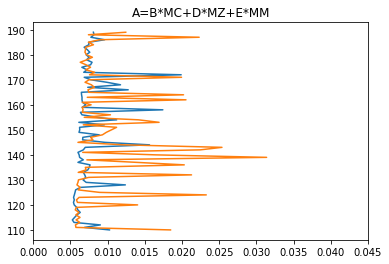

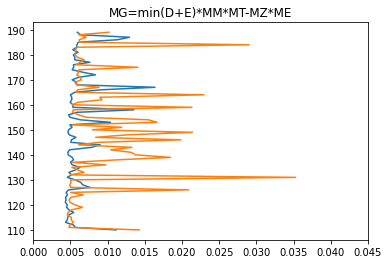

In [544]:
plt.title(FIRST_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_1, runs.ys_1_1)
plt.plot(runs.xs_2_1, runs.ys_2_1)
plt.show()

plt.title(SECOND_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_2, runs.ys_1_2)
plt.plot(runs.xs_2_2, runs.ys_2_2)
plt.show()